#### DESCRIPTION

Facial recognition is a biometric alternative that measures unique characteristics of a human
face. Applications available today include flight check in, tagging friends and family members in
photos, and “tailored” advertising. You are a computer vision engineer who needs to develop a
face recognition programme with deep convolutional neural networks. <br>

Objective: Use a deep convolutional neural network to perform facial recognition using Keras.  <br>

Dataset Details:
ORL face database composed of 400 images of size 112 x 92. There are 40 people, 10 images
per person. The images were taken at different times, lighting and facial expressions. The faces
are in an upright position in frontal view, with a slight left-right rotation. <br>

Link to the Dataset: https://www.dropbox.com/s/i7uzp5yxk7wruva/ORL_faces.npz?dl=0

Prerequisites: <br>
- Keras <br>
- Scikit Learn <br>

Steps to be followed:
1. Input the required libraries
2. Load the dataset after loading the dataset, you have to normalize every image.
3. Split the dataset
4. Transform the images to equal sizes to feed in CNN
5. Build a CNN model that has 3 main layers:

     i. Convolutional Layer <br>
     ii. Pooling Layer <br>
     iii. Fully Connected Layer <br>
      <br>

6. Train the model
7. Plot the result
8. Iterate the model until the accuracy is above 90%

#### Step 1: Input the required libraries

In [1]:
# General libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# CNN modeling
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# Seeding to ensure consistent accuracy scores for every model iteration
from numpy.random import seed
seed(42)
import tensorflow as tf
tf.random.set_seed(42)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#### Step 2: Load the dataset & normalize every image

In [2]:
# load the dataset 
dataset = np.load('D:\\Simplilearn\\05 Advanced Deep Learning and Computer Vision\\Assignment\\ORL_faces.npz', mmap_mode='r')

# determine the element names
for k in dataset.files:
    print(k)
    
# mmap_mode was called to create a memory-map. Memory-mapped files are used for accessing small segments of large files on disk, 
# without reading the entire file into memory. This way, we can find the element names without loading entire large datasets

testY
testX
trainX
trainY


In [3]:
# load x train/test images
train_x = dataset['trainX']
test_x = dataset['testX']

# normalize x train/test images and convert to float
train_x = np.array(train_x, dtype='float32')/255
test_x = np.array(test_x,dtype='float32')/255

# load y labels
train_y= dataset['trainY']
test_y= dataset['testY']

#print shape
print(train_x.shape)
print(test_x.shape)

(240, 10304)
(160, 10304)


#### Step 3: Split the dataset

In [4]:
# The ORL_faces.npz already splits the dataset into training & test sets. Normally, there is no need to train_test_split again
# However, there is the possibility of a third 'validation' set

# https://stackoverflow.com/questions/59302609/x-argument-in-train-test-split-is-whole-data-without-target-class-or-it-also-con
# The Training set is to train the algorithm, alongside hyperparameter tuning
# This Validation set is used to evaluate the trained algorithms and the various tunings
# The Test set is to apply your saved algorithm

seed = 42

# allocate test_x and test_y data
x_test = test_x
y_test = test_y

# split to create train and valid x-y sets
x_train, x_valid, y_train, y_valid = train_test_split(
    train_x, 
    train_y, 
    test_size = 0.2, 
    random_state = seed
)

print(x_train.shape)
print(x_valid.shape)
print(x_test.shape)

(192, 10304)
(48, 10304)
(160, 10304)


#### Step 4: Transform the images to equal sizes to feed into the CNN

In [5]:
img_height = 112
img_width = 92
img_shape = (img_height, img_width, 1)

#change the size of images in all 3 x-sets
x_train = x_train.reshape(x_train.shape[0], *img_shape)
x_valid = x_valid.reshape(x_valid.shape[0], *img_shape)
x_test = x_test.reshape(x_test.shape[0], *img_shape)

print(x_train.shape)
print(x_valid.shape)
print(x_test.shape)

(192, 112, 92, 1)
(48, 112, 92, 1)
(160, 112, 92, 1)


#### Step 5: Build a CNN model that has 3 main layers:

  i. Convolutional Layer <br>
  ii. Pooling Layer <br>
  iii. Fully Connected Layer <br>
      <br>

In [6]:
cnn_model = Sequential([
    Conv2D(filters = 36, kernel_size = 5, activation ='relu', input_shape = img_shape),
    MaxPooling2D(pool_size = 2),
    Flatten(),
    # now comes the fully connected layers
    # https://towardsdatascience.com/convolutional-neural-network-17fb77e76c05
    Dense(1024, activation='relu'),
    Dropout(0.5), # reduce overfitting with dropout
    Dense(20, activation='softmax') # 20 is used as there are 20 labels in the range (0-19). See Notes below*
])

cnn_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(lr=0.0001),
    metrics=['accuracy']
)

# Notes*
# (if you enter a unit other than 20, an error will prompt with the number of labels expected in the dataset)
# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw
# If the NN is a regressor, then the output layer has a single node.
# If the NN is a classifier, then it also has a single node unless softmax 
# is used in which case the output layer has one node per class label in your model.

In [7]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 108, 88, 36)       936       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 54, 44, 36)        0         
_________________________________________________________________
flatten (Flatten)            (None, 85536)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              87589888  
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                20500     
Total params: 87,611,324
Trainable params: 87,611,324
Non-trainable params: 0
____________________________________________

#### Step 6: Train the model

In [8]:
%%time

history = cnn_model.fit(
    np.array(x_train), 
    np.array(y_train), 
    batch_size = 512,
    epochs = 250, 
    verbose = 2,
    validation_data = (np.array(x_valid), np.array(y_valid))
)

Epoch 1/250
1/1 - 2s - loss: 3.0168 - accuracy: 0.0365 - val_loss: 3.0419 - val_accuracy: 0.1042
Epoch 2/250
1/1 - 1s - loss: 2.9471 - accuracy: 0.0833 - val_loss: 2.9184 - val_accuracy: 0.1875
Epoch 3/250
1/1 - 1s - loss: 2.8135 - accuracy: 0.1667 - val_loss: 2.7202 - val_accuracy: 0.5208
Epoch 4/250
1/1 - 1s - loss: 2.7930 - accuracy: 0.1927 - val_loss: 2.6081 - val_accuracy: 0.6250
Epoch 5/250
1/1 - 1s - loss: 2.6957 - accuracy: 0.2396 - val_loss: 2.5668 - val_accuracy: 0.2083
Epoch 6/250
1/1 - 1s - loss: 2.5407 - accuracy: 0.2812 - val_loss: 2.5130 - val_accuracy: 0.4167
Epoch 7/250
1/1 - 1s - loss: 2.3614 - accuracy: 0.3021 - val_loss: 2.4367 - val_accuracy: 0.4375
Epoch 8/250
1/1 - 1s - loss: 2.3159 - accuracy: 0.3698 - val_loss: 2.3461 - val_accuracy: 0.4583
Epoch 9/250
1/1 - 1s - loss: 2.2025 - accuracy: 0.4323 - val_loss: 2.2352 - val_accuracy: 0.5625
Epoch 10/250
1/1 - 1s - loss: 2.1379 - accuracy: 0.4427 - val_loss: 2.1215 - val_accuracy: 0.6875
Epoch 11/250
1/1 - 1s - loss:

In [9]:
score = cnn_model.evaluate(
    np.array(x_test), 
    np.array(y_test), 
    verbose=0
)

print('Model loss     : %0.2f%%' % (score[0] * 100))
print('Model accuracy : %0.2f%%' % (score[1] * 100))

Model loss     : 21.43%
Model accuracy : 93.75%


#### Step 7: Plot the result

In [10]:
# print the data keys available in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


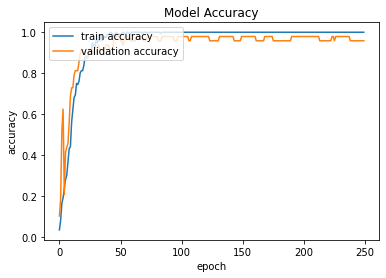

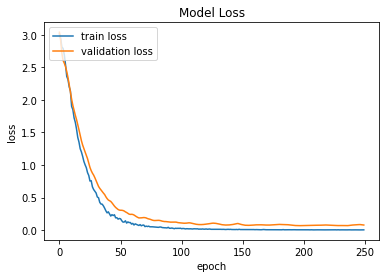

In [11]:
# plot history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'validation accuracy'], loc='upper left')
plt.show()

# plot history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper left')
plt.show()

In [12]:
print('The model seems to be slightly overfitting as we can see in the Model Loss chart that the Validation loss is slightly higher than the training loss. However, this overfitting does not appear to be too large and also seems to diminish with an increase in epochs')

# https://www.analyticsvidhya.com/blog/2020/09/overfitting-in-cnn-show-to-treat-overfitting-in-convolutional-neural-networks/

The model seems to be slightly overfitting as we can see in the Model Loss chart that the Validation loss is slightly higher than the training loss. However, this overfitting does not appear to be too large and also seems to diminish with an increase in epochs


#### Step 8: Iterate the model until the accuracy is above 90%

In [13]:
print('Our model already exceeded 90% accuracy', '\n')
print('Model accuracy : %0.2f%%' % (score[1] * 100))

Our model already exceeded 90% accuracy 

Model accuracy : 93.75%


#### Miscellaneous:

In [14]:
# =============== doesnt work for file directories, only for URLs :(

# img_directory = 'D:\\Simplilearn\\05 Advanced Deep Learning and Computer Vision\\Assignment'
# path = tf.keras.utils.get_file('ORL_faces.npz',img_directory)

# with np.load(path) as data:
#     x_train = data['trainX']
#     y_train = data['trainY']
#     x_test = data['testX']
#     y_test = data['testY']

In [15]:
# =============== does not work on npz files :(

# # ORL face database composed of 400 images of size 112 x 92
# img_directory = 'D:\\Simplilearn\\05 Advanced Deep Learning and Computer Vision\\Assignment\\ORL_faces.npz'
# img_height = 112
# img_width = 92
# img_shape = (img_height, img_width, 1)
# batch_size = 512

# # Generates a tf.data.Dataset from image files in a directory

# train_ds = tf.keras.utils.image_dataset_from_directory(
#   img_directory,
#   validation_split=0.2,
#   subset="training",
#   seed=42,
#   image_size=(img_height, img_width),
#   batch_size=batch_size
# )

# test_ds = tf.keras.utils.image_dataset_from_directory(
#   img_directory,
#   validation_split=0.2,
#   subset="testing",
#   seed=42,
#   image_size=(img_height, img_width),
#   batch_size=batch_size
# )

In [16]:
# if mmap was not called, then the function can instead be: 

# dataset = numpy.load(file)
# for k in x.iterkeys():
#     print k

# however, again this method requires the entire file to be loaded to memory, which may not always be computationally possible